# Unemployement Analysis
## Sikotra Shivam

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


ModuleNotFoundError: No module named 'plotly'

### Importing DataSet

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.DataFrame(pd.read_csv('dataset.csv'))
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


### Preprocessing Data

In [ ]:
df.columns=df.columns.str.strip().str.replace(r'\s*\(%\)\s*', '', regex=True)
df=df.rename(columns={'Region':'States','Region.1':'Region'})
print("\nAfter : \n",df.columns)



After : 
 Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')


### Checking Null Values

In [ ]:
df.isnull().sum()

States                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region                                     0
longitude                                  0
latitude                                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   States                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region                                   267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


### Correlating b/w Every Numeric Data

In [ ]:
df_num= df.select_dtypes(include=['int64','float64'])
df_num.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


### Plotting Heatmap

<Axes: >

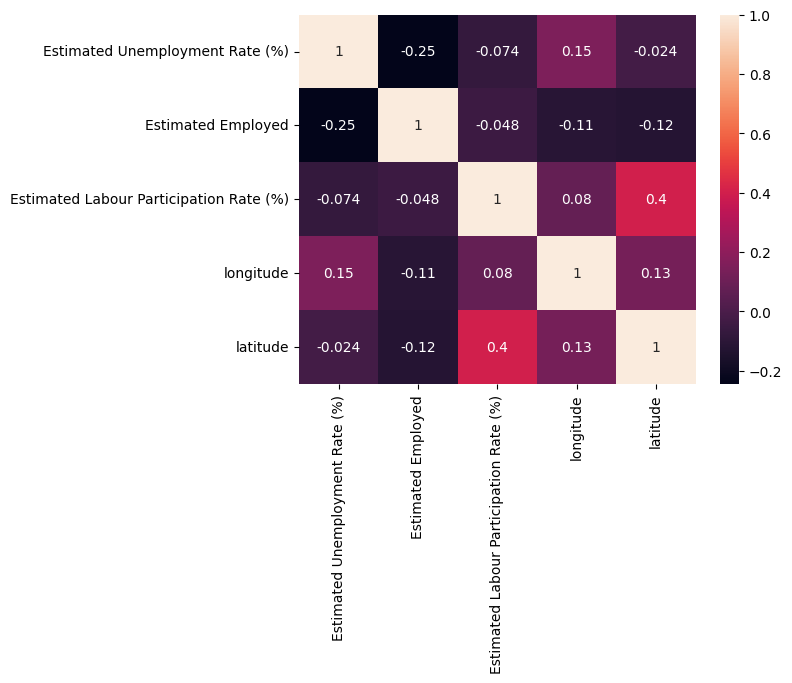

In [ ]:
sns.heatmap(df_num.corr(),annot=True)

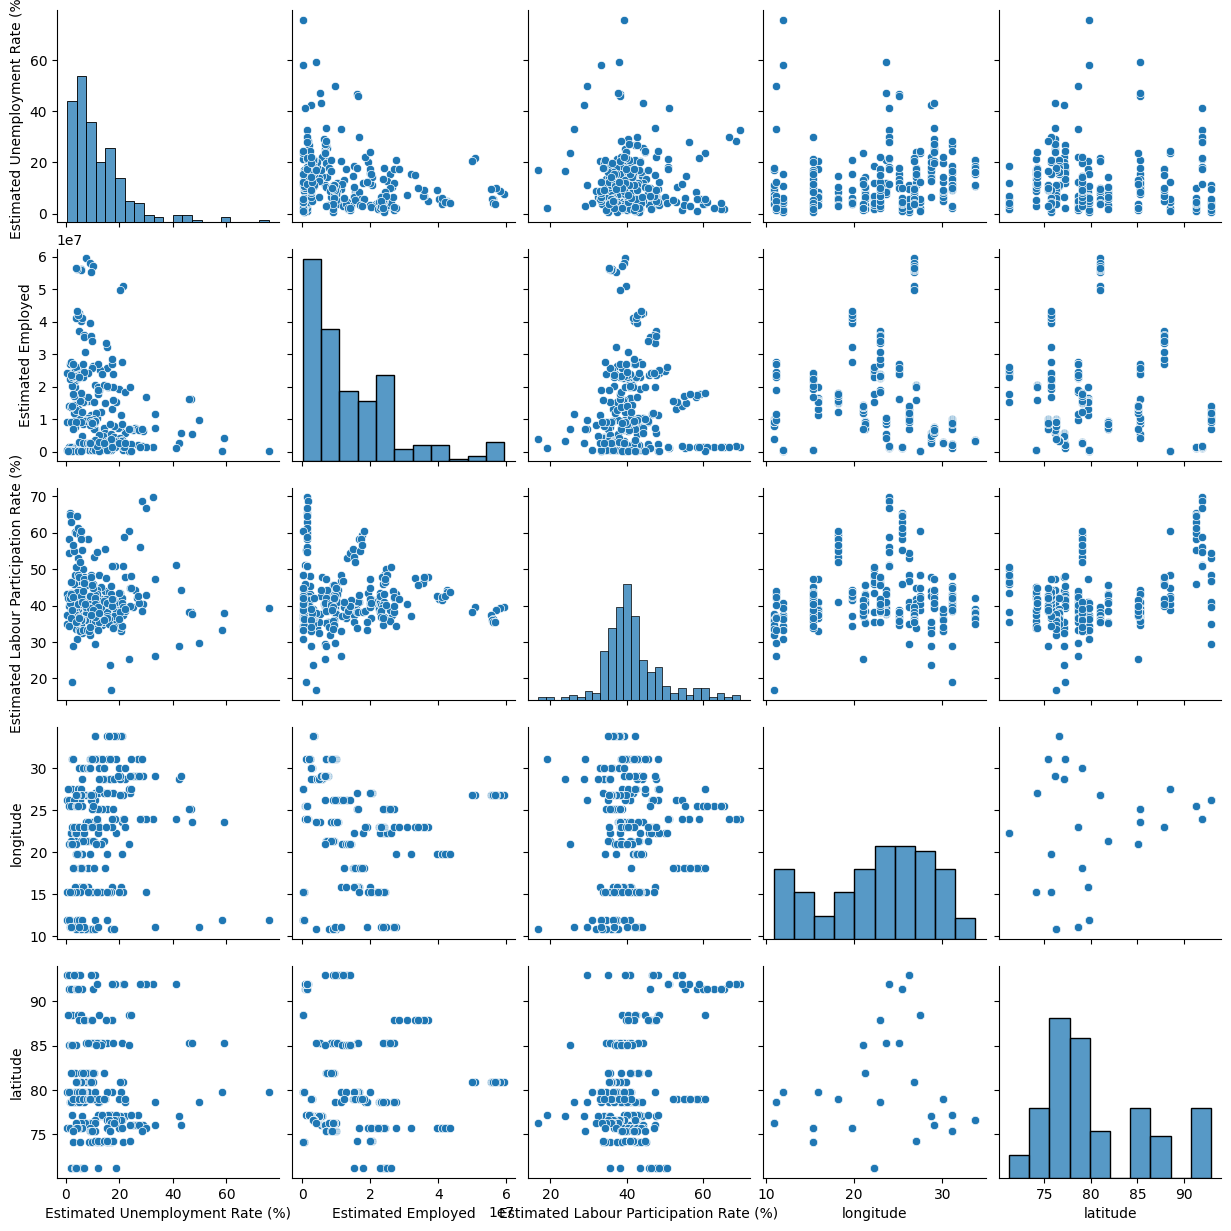

In [ ]:
sns.pairplot(df)

In [ ]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

### No. of Employed people in different Regions of India

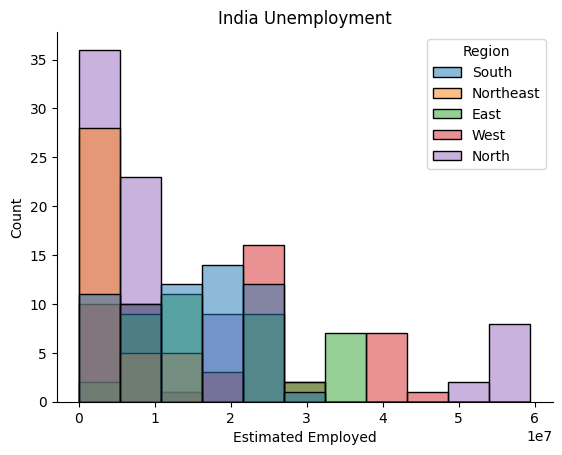

In [ ]:
plt.title("India Unemployment")
sns.histplot(x='Estimated Employed',hue='Region',data=df)
sns.despine(right=True, top=True)
#     Or
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['top'].set_visible(False)

plt.show()


### UnEmployement Rate in different Regions of India

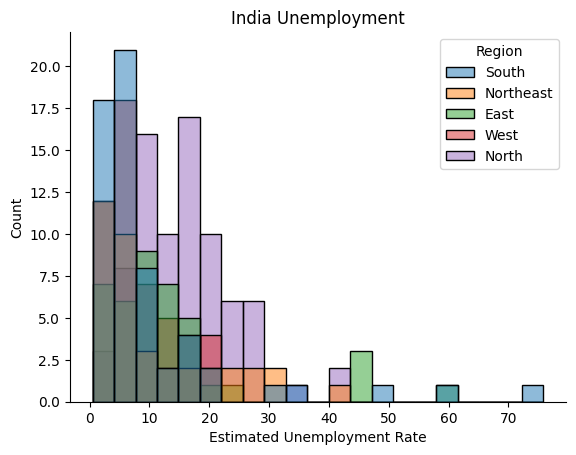

In [ ]:
plt.title("India Unemployment")
sns.histplot(x='Estimated Unemployment Rate',hue='Region',data=df)
sns.despine(right=True, top=True)

plt.show()


In [ ]:
unemploy=df[['States','Region','Estimated Unemployment Rate']]
fig=px.sunburst(unemploy,path=['Region','States'],values='Estimated Unemployment Rate',width=700,height=700,title='Unemployement Rate in India')
fig.show()